# Signature Classifier

In [10]:
img_path = "C:/Users/DeLL/Downloads/Telegram Desktop/558/img/Train/"
img_label = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']


Each signature in the Train file is associated with a separate file containing its images

Construct a dataframe that stores the image path and its associated file label(signature number)

In [11]:
import pandas as pd
import os
img_list = []
label_list = []
for label in img_label:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)
        
df = pd.DataFrame({'img':img_list, 'signature':label_list})

In [12]:
df.head()

,img,signature
0,C:/Users/DeLL/Downloads/Telegram Desktop/558/i...,01
1,C:/Users/DeLL/Downloads/Telegram Desktop/558/i...,01
2,C:/Users/DeLL/Downloads/Telegram Desktop/558/i...,01
3,C:/Users/DeLL/Downloads/Telegram Desktop/558/i...,01
4,C:/Users/DeLL/Downloads/Telegram Desktop/558/i...,01


In [13]:
df['signature'].value_counts()

signature
03    99
06    99
25    99
14    98
05    98
18    98
04    97
16    85
21    80
26    79
24    79
23    79
22    79
20    79
19    79
01    79
15    79
02    79
09    79
08    79
07    79
27    79
17    78
12    78
11    78
10    77
13    72
Name: count, dtype: int64

Based on the number of each signature in the data set we can say that the data is balanced 

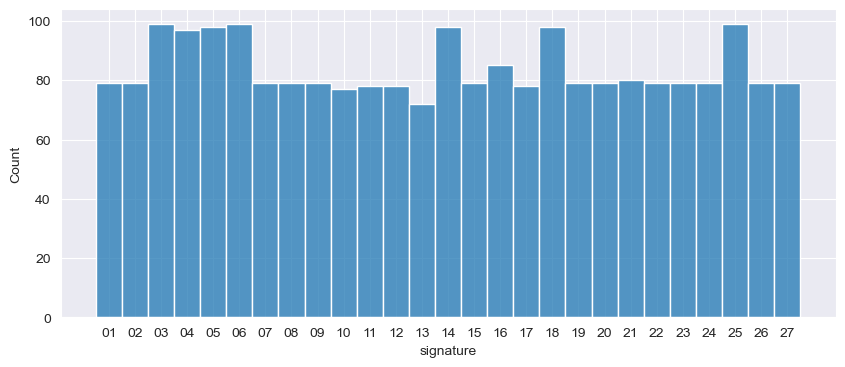

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.set_style('darkgrid')
sns.histplot(df['signature'])
plt.show()

Based on the number of signatures in the data set, it is considered balanced

In [15]:
plt.imread(df['img'][0]).shape


(169, 182, 3)

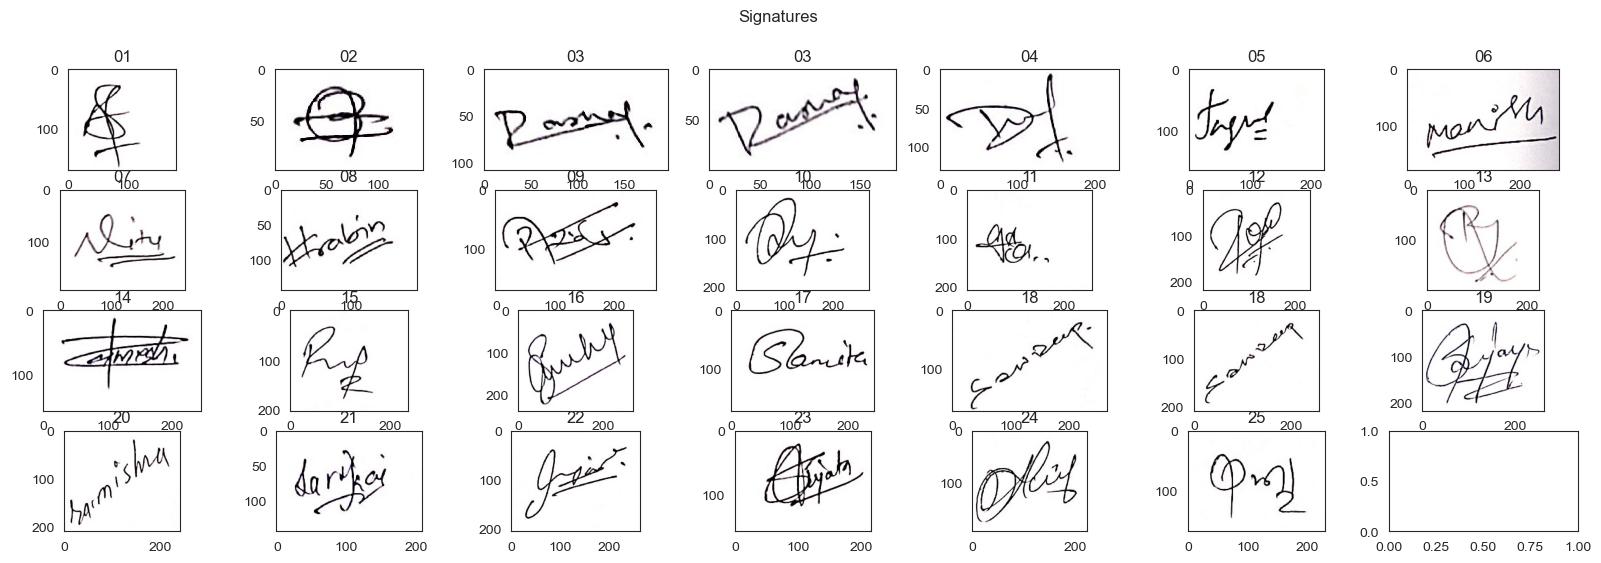

In [16]:
sns.set_style('white')
fig, axs = plt.subplots(ncols=7,nrows=4 ,figsize=(20,6))
fig.suptitle('Signatures')
random_num = 1
k = 0
index = 0
for j in range (4):
    for i in range (7):
        label = df['signature'][index]
        axs[j][i].set_title(label)
        axs[j][i].imshow((plt.imread(df['img'][index])))
        index +=80
        k = k+1
        if k == 27:
            break

With larger images the distance metric becomes less effective in distinguishing between similar classes,and also they are slower to trainas.

Smaller images have fewer pixels, leading to lower dimensionality of the data and can improve classification accuracy.

This code to simplify the image for the model by reducing its dimensions

In [17]:
import numpy as np
import cv2
X = []
for img in df['img']:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (10, 10),interpolation = cv2.INTER_AREA)
    img = img/255
    X.append(img)

Images after editings

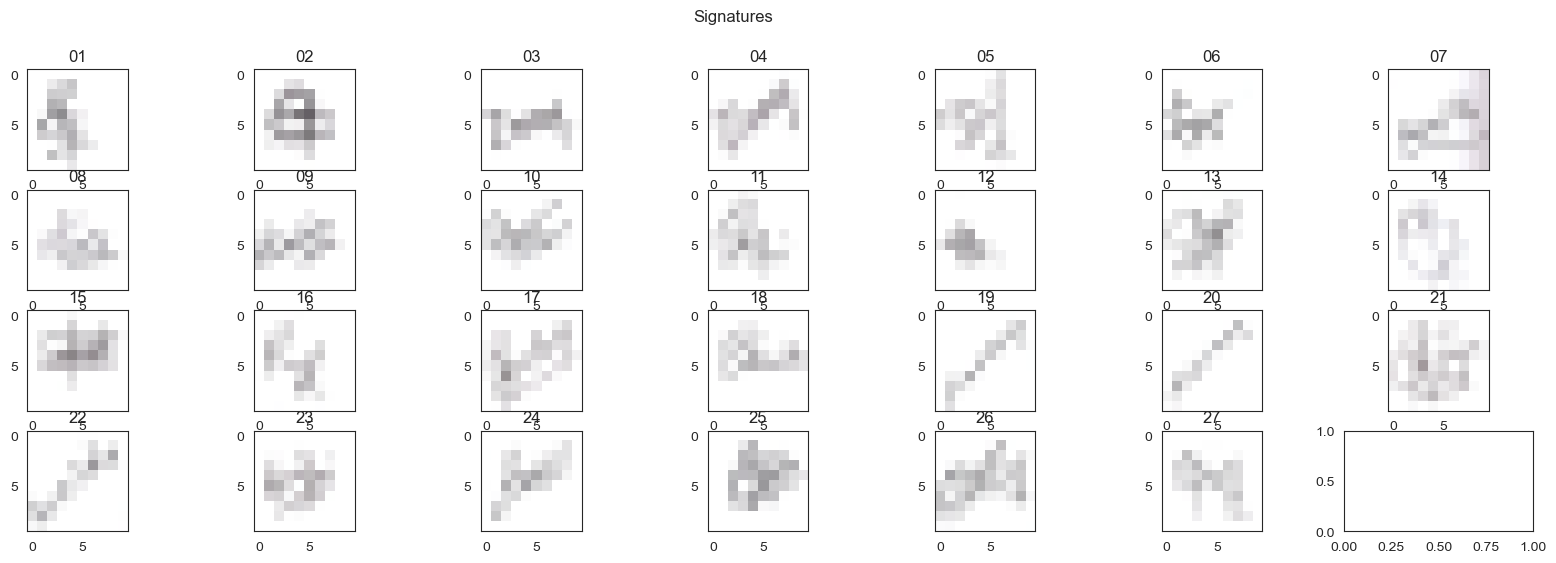

In [18]:
sns.set_style('white')
fig, axs = plt.subplots(ncols=7,nrows=4 ,figsize=(20,6))
fig.suptitle('Signatures')
random_num = 1
k = 0
index = 0
for j in range (4):
    for i in range (7):
        label = img_label[k];
        axs[j][i].set_title(label)
        axs[j][i].imshow(X[index])
        index +=80
        k = k+1
        if k == 27:
            break

The image has to be converted to one-dimensional array in order for the model to read it.


In [19]:
X = np.asarray([img.ravel() for img in X])

Store the target signature labels in a vector y

In [20]:
y = df['signature']

K number of neighbor have a great effect of model performance
KNN uses parameter tuning to determine the optimal value of k

K_Accuracy:
-calculate accuracy for a range of k values between 1 and 10
-create a plot showing accuracy against k
-return the k value that  the highest accuracy

In [21]:
from sklearn.neighbors import KNeighborsClassifier
def K_Accuracy(x,y,title):
    from sklearn.metrics import accuracy_score
    K=[]
    a=[]
    for k in range(10):
        model = KNeighborsClassifier(n_neighbors=k+1,metric='euclidean')
        model.fit(X_train,y_train)
        predictions = model.predict(x)
        a.append(accuracy_score(y,predictions))
        K.append(k+1)

    best_k = K[a.index(max(a))]
    sns.set_style('darkgrid')
    plt.figure(figsize=(4,4))
    
    
    plt.plot(K,a)
    plt.xlabel('k')
    plt.ylabel('Accuracy score')
    plt.title(title)
    plt.show()
    return best_k

In [22]:
from sklearn.metrics import confusion_matrix 
def conf_plot(y, predictions):
    cm = confusion_matrix(y,predictions)
    plt.figure(figsize=(20,20))
    sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    tick_labels = ['1', '2', '3', '4']
    plt.xticks(range(len(tick_labels)), tick_labels)
    plt.yticks(range(len(tick_labels)), tick_labels)
    plt.title(('Accuracy: %.3f' % accuracy_score),size=15)
    plt.show()

Splitting data into train validation and test sets

In [23]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

to choose the number of neighbors  

C:\Users\DeLL\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
invalid literal for int() with base 10: ''
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\DeLL\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 205, in _count_physical_cores
    cpu_count_physical = sum(map(int, cpu_info))
                         ^^^^^^^^^^^^^^^^^^^^^^^


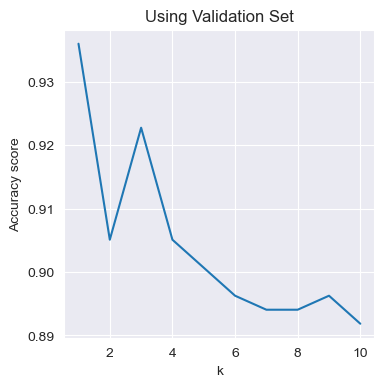

In [24]:
k_from_validation = K_Accuracy(X_val,y_val,'Using Validation Set')

In [25]:
best_k = k_from_validation
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,predictions)
print('KNN Accuracy: %.3f' % accuracy_score)

KNN Accuracy: 0.923


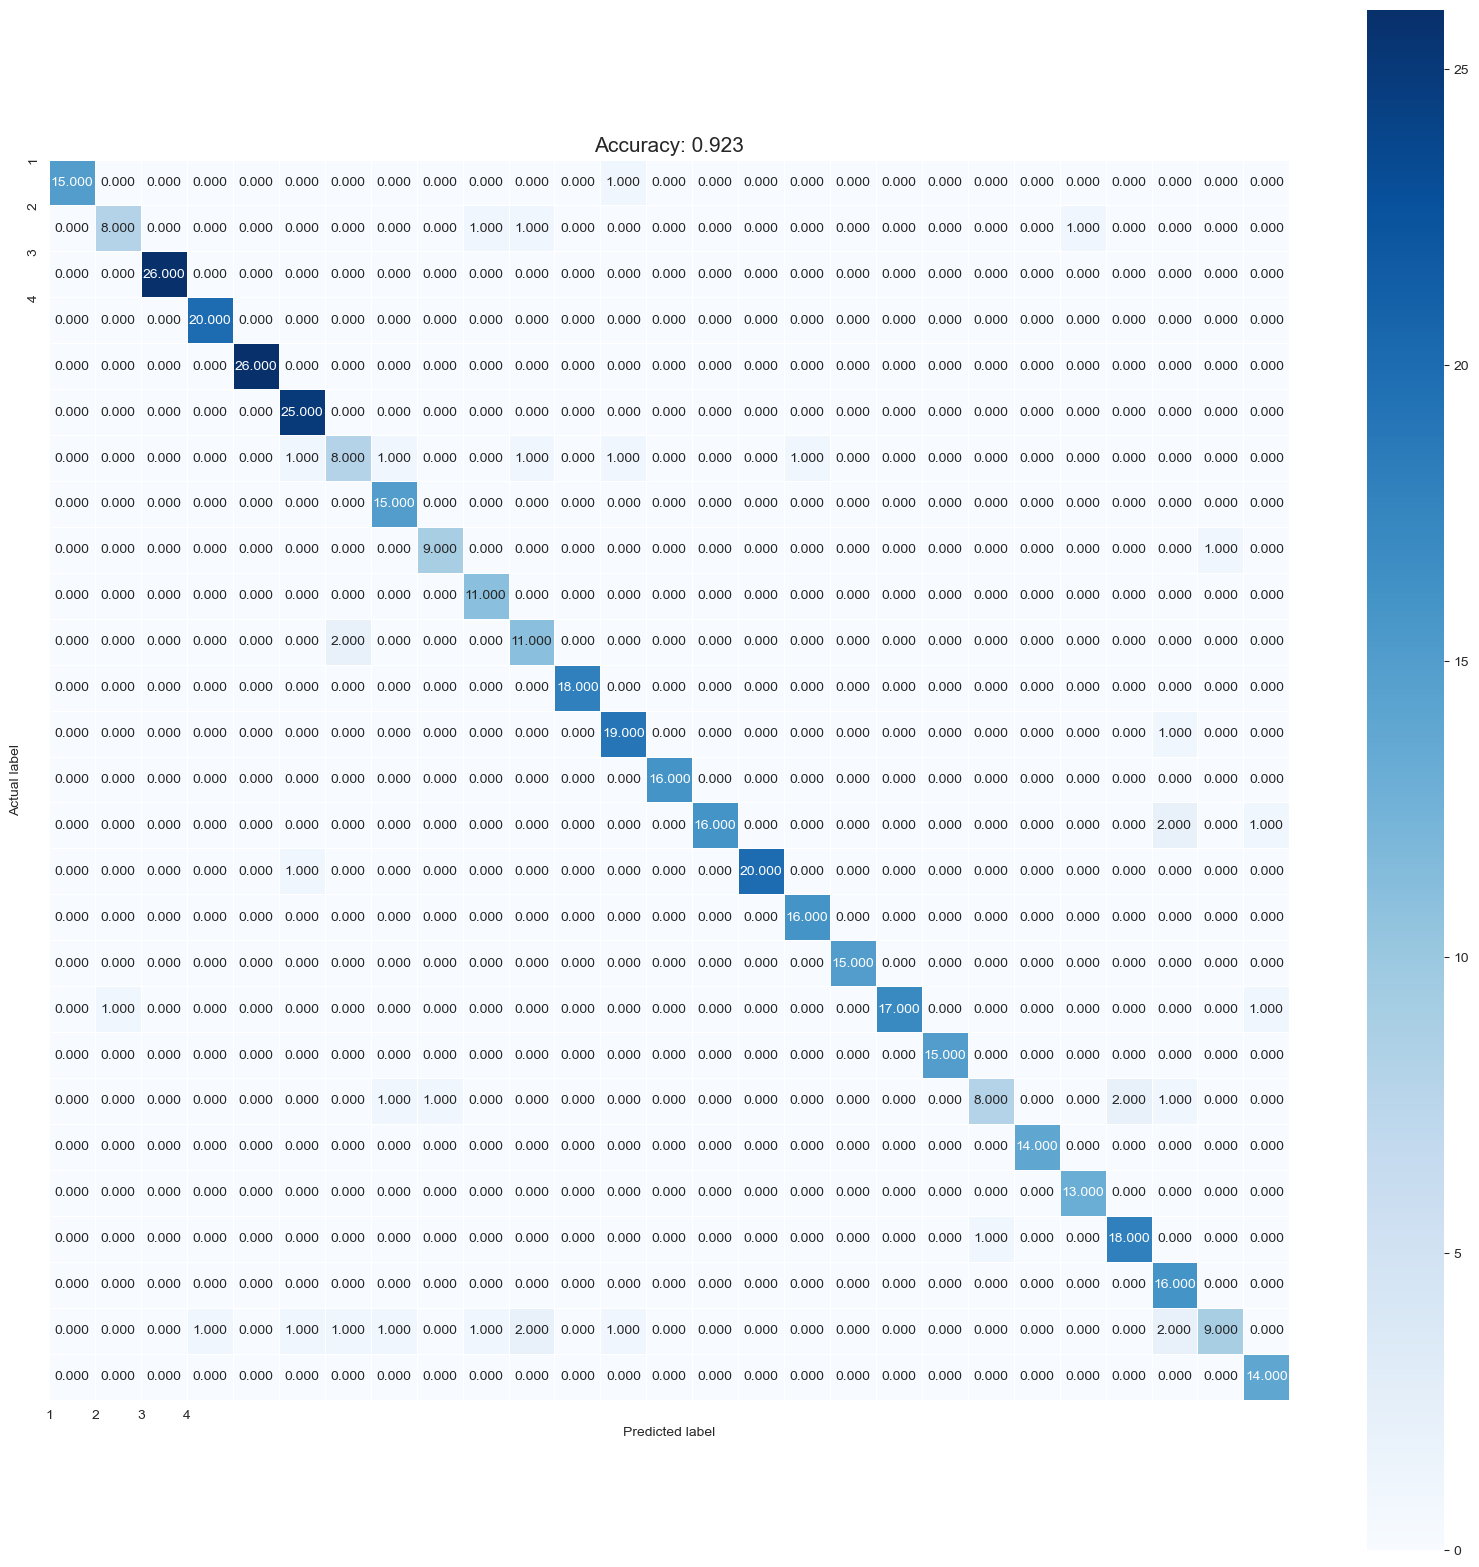

In [28]:
from sklearn.metrics import confusion_matrix 
conf_plot(y_test,predictions)